<a href="https://colab.research.google.com/github/Kushdevu/CODSOFT_INTERNSHIP/blob/main/TASK1_TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODSOFT INTERNSHIP**

TASK 1: TITANIC SURVIVAL PREDICTION

Done by: Devendra Kushwah

Aim: The primary aim of this project is to leverage data science techniques to construct a predictive model that accurately discerns the likelihood of survival for individual passengers aboard the RMS Titanic.


# **Project Summary -**

The sinking of the RMS Titanic on April 15, 1912, stands as one of history's most tragic maritime disasters. With over 1,500 lives lost among the estimated 2,224 passengers and crew, the event left an indelible mark on the collective consciousness. In this project, we delve into the Titanic dataset to predict whether individual passengers survived or perished. By analyzing factors such as age, gender, ticket class, fare, and cabin allocation, we aim to unravel the patterns that determined survival aboard the ill-fated ship. Join us as we navigate through this classic beginner project, leveraging readily available data to explore the human story behind the Titanic tragedy.


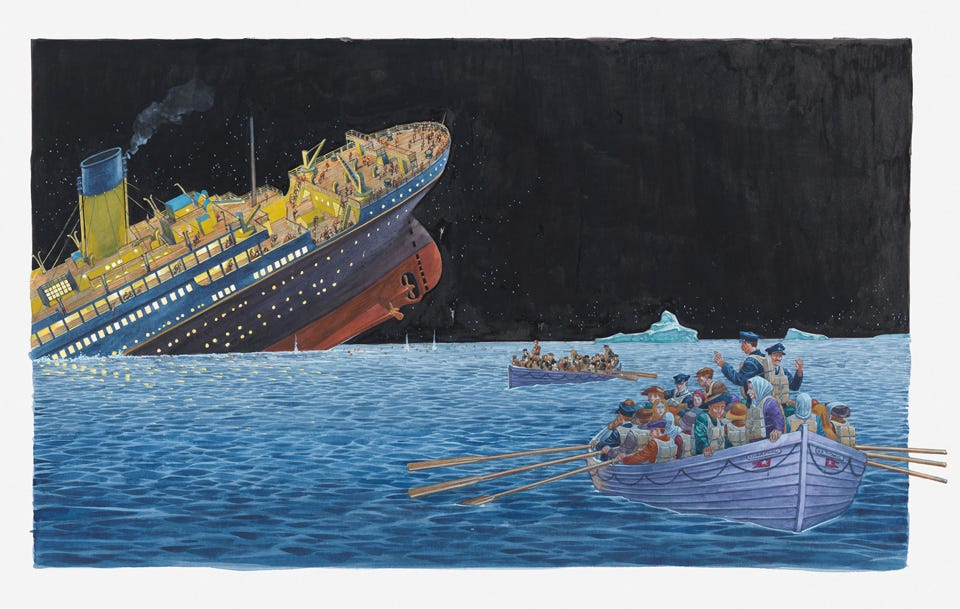



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


* To develop a model that correctly predicts whether a passenger on the Titanic survived or not.
* To develop a user friendly interface for giving instant prediction for a random input.

## ADDRESSING THE PROBLEM
* I checked various classifier model to find the best accuracy score of the model and found all are performing equally fine.
* Here I intend to use Logistic Regression to prepare the model.
* I will use for loop to create the user friendly interface.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Dataset Loading

In [ ]:
# Load Dataset
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')

### Dataset First View

In [ ]:
# Dataset First Look
titanic_data.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
titanic_data.shape

### Dataset Information

In [ ]:
# Dataset Info
titanic_data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
num_duplicate_rows = titanic_data.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the Titanic dataset:", num_duplicate_rows)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values_count = titanic_data.isnull().sum()
# Display the missing values count for each column
print("Missing Values Count:")
print(missing_values_count)

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values in Titanic Dataset')
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# Get the list of columns
columns_list = titanic_data.columns

# Display the list of columns
print("Columns in the Titanic dataset:")
for column in columns_list:
    print(column)

In [ ]:
# Dataset Describe
titanic_data.describe()

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
# Iterate through each column and print unique values
for column in titanic_data.columns:
    unique_values = titanic_data[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Impute missing values for Age with mean
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

# Impute missing values for Embarked with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
titanic_data.drop('Cabin', axis=1, inplace=True)

# Verify that missing values have been handled
missing_values_after_handling = titanic_data.isnull().sum()
print("Missing Values Count after handling:")
print(missing_values_after_handling)


In [ ]:
# Count of survivors and non-survivors by sex
survival_count_by_sex = titanic_data.groupby(['Sex', 'Survived']).size().unstack()
print("\nSurvival Count by Sex:")
print(survival_count_by_sex)

In [ ]:
# Visualizing survival count by sex
survival_count_by_sex.plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

In [ ]:
# Count of survivors and non-survivors by passenger class
survival_count_by_class = titanic_data.groupby(['Pclass', 'Survived']).size().unstack()
print("\nSurvival Count by Passenger Class:")
print(survival_count_by_class)

In [ ]:
# Visualizing survival count by passenger class
survival_count_by_class.plot(kind='bar', stacked=True)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()


In [ ]:
# Count of survivors and non-survivors by port of embarkation
survival_count_by_embarkation = titanic_data.groupby(['Embarked', 'Survived']).size().unstack()
print("\nSurvival Count by Port of Embarkation:")
print(survival_count_by_embarkation)

In [ ]:
# Visualizing survival count by port of embarkation
survival_count_by_embarkation.plot(kind='bar', stacked=True)
plt.title('Survival Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

In [ ]:
# Split the dataset into features (X) and target (y)
X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
Y = titanic_data['Survived']
print(X)


In [ ]:
print(Y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
# Encode categorical variables using one-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

# Split the data into features and target variable
X = titanic_data.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

In [ ]:
#Evaluation of the Model
#Accuracy Score
X_train_prediction = model.predict(X_train)

In [ ]:
print(X_train_prediction)

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data = ', training_data_accuracy)

In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data = ', test_data_accuracy)

In [ ]:
print(Y_test)

In [ ]:
X_test_prediction = model.predict(X_test)

# Calculating the survival rate
survival_rate = X_test_prediction.mean()

if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")